In [3]:
import pathlib
import polars as pl

In [4]:
path_data = pathlib.Path().cwd().parent / "data" 

df = pl.read_csv(path_data / 'train.csv')

In [5]:
# Variáveis categóricas
categorical_vars = [
    'Gender',
    'Location', 
    'Subscription_Type',
    'Last_Interaction_Type',
    'Promo_Opted_In',
]

# Variáveis numéricas contínuas
continuous_vars = [
    'Age',
    'Account_Age_Months',
    'Monthly_Spending',
    'Total_Usage_Hours',
    'Streaming_Usage',     # Porcentagem (0-99%)
    'Discount_Used',       # Porcentagem (0-99%)
    'Satisfaction_Score'   # Escala 1-10
]

# Variáveis numéricas discretas (contagens)
discrete_vars = [
    'Support_Calls',       # Número de chamadas
    'Late_Payments',       # Número de pagamentos atrasados
    'Complaint_Tickets'    # Número de tickets de reclamação
]

# Todas as variáveis numéricas (contínuas + discretas)
numeric_vars = continuous_vars + discrete_vars

# Variável alvo
target_var = 'Churn'

# Variáveis explicativas (features)
feature_vars = [col for col in df.columns if col not in ['Customer_ID', 'Churn']]

In [6]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Pré-processamento
## aplicar standard scaler para variáveis numéricas
## aplicar one-hot encoding para variáveis categóricas

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_vars),
        ('cat', OneHotEncoder(drop='first'), categorical_vars)  # Evita dummy variable trap
    ],
    remainder='passthrough'  # Mantém outras colunas inalteradas
)

X_ = df.select(feature_vars).to_pandas()
X = preprocessor.fit_transform(X_)

In [7]:
import pandas as pd

# Obter os nomes das colunas após transformação
feature_names = (
    numeric_vars + 
    list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_vars))
)

# Criar DataFrame com os dados transformados
X_processed = pd.DataFrame(X, columns=feature_names)

# Adicionar a variável target
y = df.select('Churn').to_pandas()
X_processed['Churn'] = y

print("Shape do DataFrame processado:", X_processed.shape)
print("\nPrimeiras 5 linhas:")
X_processed.head()

Shape do DataFrame processado: (8000, 21)

Primeiras 5 linhas:


,Age,Account_Age_Months,Monthly_Spending,Total_Usage_Hours,Streaming_Usage,Discount_Used,Satisfaction_Score,Support_Calls,Late_Payments,Complaint_Tickets,...,Location_Florida,Location_Illinois,Location_New York,Location_Texas,Subscription_Type_Enterprise,Subscription_Type_Premium,Last_Interaction_Type_Neutral,Last_Interaction_Type_Positive,Promo_Opted_In_1,Churn
0,-1.646213,1.170871,0.871806,1.147867,0.386761,0.927128,-0.855085,0.189269,0.005359,-1.394268,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1
1,-0.170526,-0.954108,0.156211,-1.550100,-1.132385,1.415609,-0.160564,0.189269,-0.709120,0.728444,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
2,0.030704,-1.662434,1.163718,-0.336015,1.215385,-1.305928,0.186696,-0.503074,-0.709120,0.728444,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
3,-1.512059,1.466006,1.689525,0.885170,0.145078,-0.608098,-0.507825,-0.156902,0.719837,0.728444,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0
4,1.439315,-1.072162,-0.372341,1.566761,1.111807,0.438647,-1.549605,0.189269,1.434315,-1.394268,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1


In [8]:
X_processed

,Age,Account_Age_Months,Monthly_Spending,Total_Usage_Hours,Streaming_Usage,Discount_Used,Satisfaction_Score,Support_Calls,Late_Payments,Complaint_Tickets,...,Location_Florida,Location_Illinois,Location_New York,Location_Texas,Subscription_Type_Enterprise,Subscription_Type_Premium,Last_Interaction_Type_Neutral,Last_Interaction_Type_Positive,Promo_Opted_In_1,Churn
0,-1.646213,1.170871,0.871806,1.147867,0.386761,0.927128,-0.855085,0.189269,0.005359,-1.394268,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1
1,-0.170526,-0.954108,0.156211,-1.550100,-1.132385,1.415609,-0.160564,0.189269,-0.709120,0.728444,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
2,0.030704,-1.662434,1.163718,-0.336015,1.215385,-1.305928,0.186696,-0.503074,-0.709120,0.728444,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
3,-1.512059,1.466006,1.689525,0.885170,0.145078,-0.608098,-0.507825,-0.156902,0.719837,0.728444,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0
4,1.439315,-1.072162,-0.372341,1.566761,1.111807,0.438647,-1.549605,0.189269,1.434315,-1.394268,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,-1.243753,-1.249244,-0.747342,1.360864,-0.303760,1.520284,1.575737,0.189269,-1.423598,-0.686697,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0
7996,-0.841293,1.466006,-0.986728,-1.166704,-0.890702,1.555175,-0.855085,-1.195418,-1.423598,-0.686697,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
7997,0.835625,-0.599945,-1.625822,-0.549012,-1.408593,-1.410602,-1.549605,-1.541589,-1.423598,1.436014,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
7998,0.366088,1.406979,-0.750636,-0.421214,-1.166911,-1.166362,1.575737,1.573957,-1.423598,-0.686697,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0


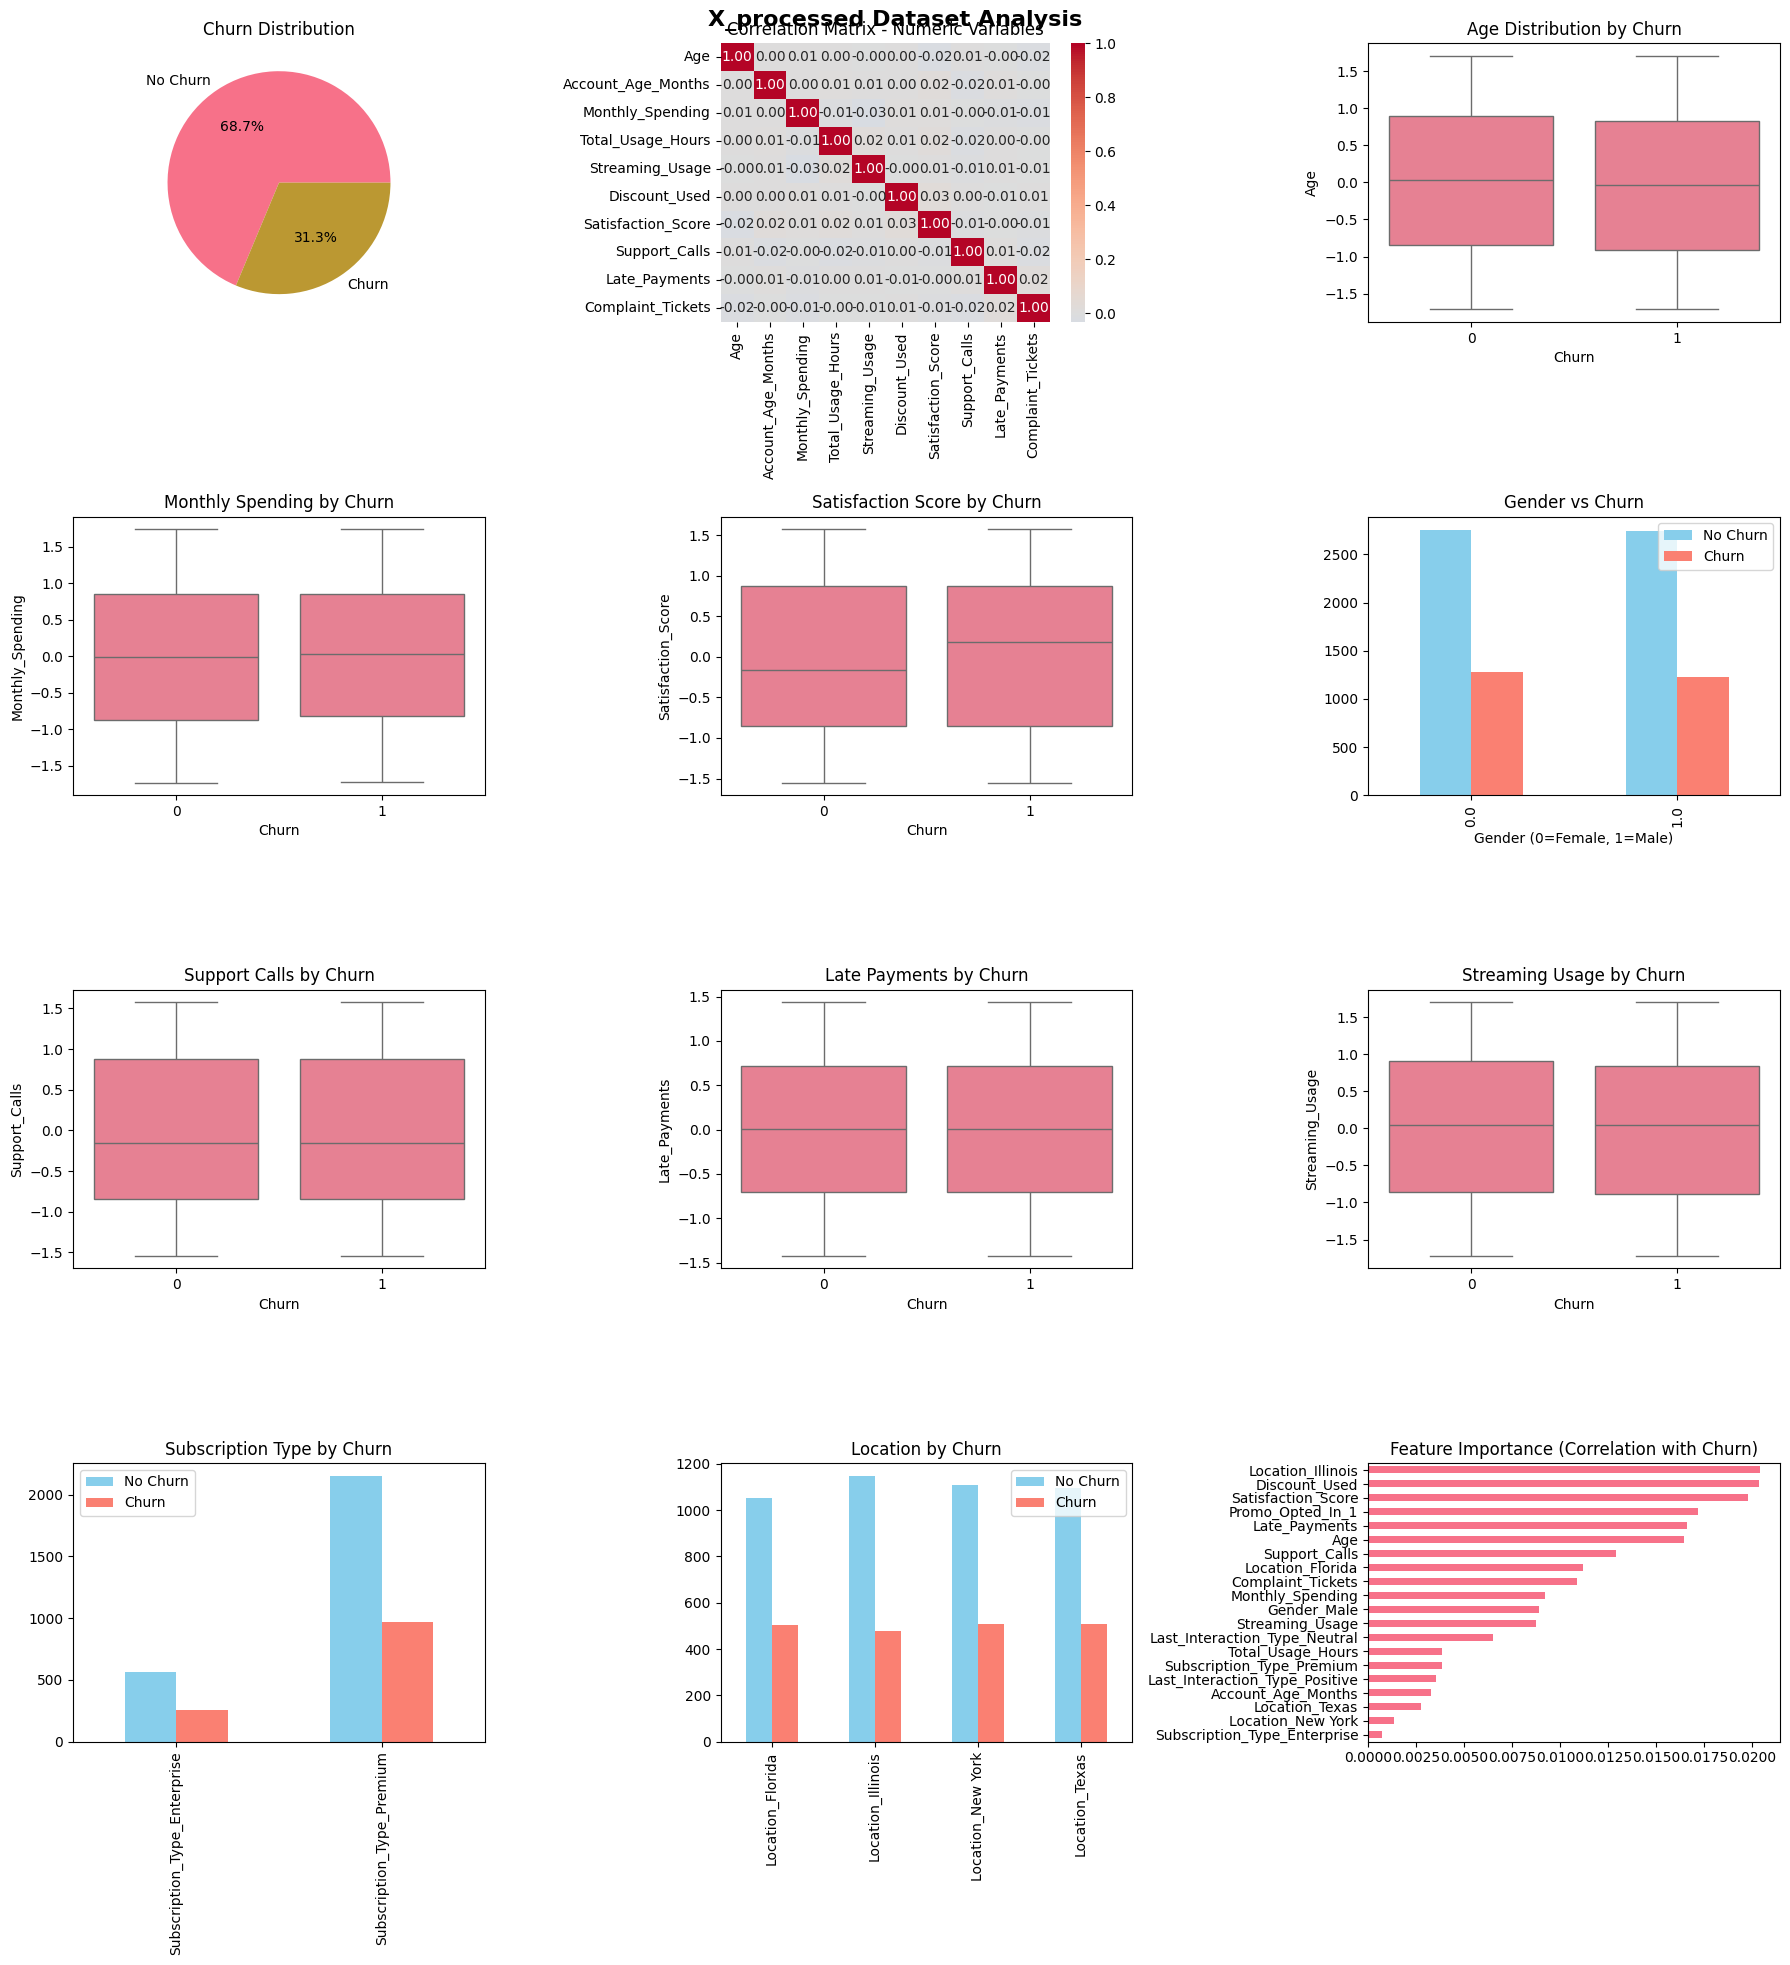


Dataset Summary:
Total samples: 8000
Total features: 20
Churn rate: 31.31%

Missing values: 0


In [11]:
import seaborn as sns

import matplotlib.pyplot as plt

# Set up the plotting style
plt.style.use('default')
sns.set_palette("husl")

# Create a comprehensive visualization of the processed dataset
fig, axes = plt.subplots(4, 3, figsize=(18, 20))
fig.suptitle('X_processed Dataset Analysis', fontsize=16, fontweight='bold')

# 1. Target variable distribution
axes[0, 0].pie(X_processed['Churn'].value_counts(), labels=['No Churn', 'Churn'], autopct='%1.1f%%')
axes[0, 0].set_title('Churn Distribution')

# 2. Correlation heatmap for numeric variables
numeric_cols = [col for col in X_processed.columns if col not in ['Churn'] and not col.startswith(('Gender_', 'Location_', 'Subscription_Type_', 'Last_Interaction_Type_', 'Promo_Opted_In_'))]
corr_matrix = X_processed[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, ax=axes[0, 1], fmt='.2f')
axes[0, 1].set_title('Correlation Matrix - Numeric Variables')

# 3. Age distribution by Churn
sns.boxplot(data=X_processed, x='Churn', y='Age', ax=axes[0, 2])
axes[0, 2].set_title('Age Distribution by Churn')

# 4. Monthly Spending by Churn
sns.boxplot(data=X_processed, x='Churn', y='Monthly_Spending', ax=axes[1, 0])
axes[1, 0].set_title('Monthly Spending by Churn')

# 5. Satisfaction Score by Churn
sns.boxplot(data=X_processed, x='Churn', y='Satisfaction_Score', ax=axes[1, 1])
axes[1, 1].set_title('Satisfaction Score by Churn')

# 6. Gender distribution by Churn
gender_churn = X_processed.groupby(['Gender_Male', 'Churn']).size().unstack()
gender_churn.plot(kind='bar', ax=axes[1, 2], color=['skyblue', 'salmon'])
axes[1, 2].set_title('Gender vs Churn')
axes[1, 2].set_xlabel('Gender (0=Female, 1=Male)')
axes[1, 2].legend(['No Churn', 'Churn'])

# 7. Support Calls by Churn
sns.boxplot(data=X_processed, x='Churn', y='Support_Calls', ax=axes[2, 0])
axes[2, 0].set_title('Support Calls by Churn')

# 8. Late Payments by Churn
sns.boxplot(data=X_processed, x='Churn', y='Late_Payments', ax=axes[2, 1])
axes[2, 1].set_title('Late Payments by Churn')

# 9. Streaming Usage by Churn
sns.boxplot(data=X_processed, x='Churn', y='Streaming_Usage', ax=axes[2, 2])
axes[2, 2].set_title('Streaming Usage by Churn')

# 10. Subscription Type distribution
sub_cols = [col for col in X_processed.columns if col.startswith('Subscription_Type_')]
sub_data = X_processed[sub_cols + ['Churn']].groupby('Churn').sum()
sub_data.T.plot(kind='bar', ax=axes[3, 0], color=['skyblue', 'salmon'])
axes[3, 0].set_title('Subscription Type by Churn')
axes[3, 0].legend(['No Churn', 'Churn'])

# 11. Location distribution
loc_cols = [col for col in X_processed.columns if col.startswith('Location_')]
loc_data = X_processed[loc_cols + ['Churn']].groupby('Churn').sum()
loc_data.T.plot(kind='bar', ax=axes[3, 1], color=['skyblue', 'salmon'])
axes[3, 1].set_title('Location by Churn')
axes[3, 1].legend(['No Churn', 'Churn'])

# 12. Feature importance visualization (absolute correlation with target)
feature_importance = X_processed.drop('Churn', axis=1).corrwith(X_processed['Churn']).abs().sort_values(ascending=True)
feature_importance.plot(kind='barh', ax=axes[3, 2])
axes[3, 2].set_title('Feature Importance (Correlation with Churn)')

plt.tight_layout()
plt.show()

# Additional summary statistics
print("\nDataset Summary:")
print(f"Total samples: {len(X_processed)}")
print(f"Total features: {len(X_processed.columns) - 1}")
print(f"Churn rate: {X_processed['Churn'].mean():.2%}")
print(f"\nMissing values: {X_processed.isnull().sum().sum()}")